In [1]:
from datasets import load_dataset, VerificationMode
from pprint import pprint
import polars as pl

In [24]:
dataset_iter = load_dataset("mesolitica/Malaysian-Translation", "stage1", split="train", streaming=True)

Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

In [25]:
dataset_head = dataset_iter.take(10)
dataset_head = pl.DataFrame(dataset_head)

In [26]:
dataset_head

src,tgt,prefix
str,str,str
"""Wah, ramai sungguh orang membe…","""Pengkritik telah menuduh badan…","""terjemah ke Melayu: """
"""Wah, ramai sungguh orang membe…","""Critics have accused the Malay…","""terjemah ke Inggeris: """
"""Apasal la setengah orang ni su…","""Mengapa sesetengah pengkritik …","""terjemah ke Melayu: """
"""Apasal la setengah orang ni su…","""Why have some critics accused …","""terjemah ke Inggeris: """
"""Pengkritik telah menuduh badan…","""Wah, ramai sungguh orang membe…","""terjemah ke johor: """
"""Critics have accused the Malay…","""Wah, ramai sungguh orang membe…","""terjemah ke johor: """
"""Mengapa sesetengah pengkritik …","""Apasal la setengah orang ni su…","""terjemah ke johor: """
"""Why have some critics accused …","""Apasal la setengah orang ni su…","""terjemah ke johor: """
"""Wah, soalan tu bagus gile! Nak…","""Itu soalan susulan yang hebat!…","""terjemah ke Melayu: """


# Test

In [2]:
dataset = load_dataset(
    "mesolitica/Malaysian-Translation", 
    "stage1", 
    data_files="stage1/train-00001-of-00032.parquet",
    verification_mode=VerificationMode.NO_CHECKS
)

In [3]:
data_dict = dataset['train']

data_dict

Dataset({
    features: ['src', 'tgt', 'prefix'],
    num_rows: 222703
})

In [4]:
data_df = pl.DataFrame(list(data_dict))
data_df.head()

src,tgt,prefix
str,str,str
"""كراجأن مليسيا سكارڠ، يڠ دكتواي…","""Kerajaan Malaysia sekarang, ya…","""terjemah ke Melayu: """
"""Orang ramai boleh diberi jamin…","""اورڠ راماي بوليه دبري جامينن ب…","""terjemah ke Jawi: """
"""اورڠ راماي بوليه دبري جامينن ب…","""Orang ramai boleh diberi jamin…","""terjemah ke Melayu: """
"""Parti Pertubuhan Kebangsaan Me…","""ڤرتي ڤرتوبوهن كبڠسأن ملايو برس…","""terjemah ke Jawi: """
"""ڤرتي ڤرتوبوهن كبڠسأن ملايو برس…","""Parti Pertubuhan Kebangsaan Me…","""terjemah ke Melayu: """


In [5]:
(
    data_df
    .select(pl.col("prefix"))
    .unique()
)

prefix
str
"""terjemah ke Jawi: """
"""terjemah ke Melayu: """


In [6]:
(
    data_df.null_count()
)

src,tgt,prefix
u32,u32,u32
0,0,0


In [7]:
(
    data_df.group_by("src").len().sort("len", descending=True)
)

src,len
str,u32
"""Kerajaan Malaysia telah mengam…",1
"""كراجأن مليسيا يڠ بهارو، دكتواي…",1
"""Sejak kemenangan gabungan Paka…",1
"""يا، ترداڤت ببراڤ ڤركمبڠن كتارا…",1
"""منچڬه اينسيدن سروڤا دڠن سكندل …",1
…,…
"""Walaupun masih agak awal untuk…",1
"""كراجأن د ڤلباڬاي ڤريڠكت، ترماس…",1
"""Kerajaan Malaysia yang baharu,…",1


In [8]:
(
    data_df.group_by(["src", "tgt"]).len().sort("len", descending=True)
)

src,tgt,len
str,str,u32
"""ڤربيچاراان نجيب رازق، بكس ڤردا…","""Perbicaraan Najib Razak, bekas…",1
"""Walaupun mencabar untuk menguk…","""والاوڤون منچابر اونتوق مڠوكور …",1
"""نجيب رازق، يڠ برخدمت سباڬاي ڤر…","""Najib Razak, yang berkhidmat s…",1
"""Berikutan kekalahan pilihan ra…","""برايكوتن ككالاهن ڤيليهن راي نج…",1
"""Organisasi antarabangsa dan ke…","""اورڬانيساسي انتارابڠسا دان كرا…",1
…,…,…
"""Untuk memantau institusi awam …","""اونتوق ممنتاو اينستيتوسي عوام …",1
"""ساي مموهون معاف، تتاڤي ساي تيد…","""Saya memohon maaf, tetapi saya…",1
"""Perbicaraan Najib Razak, bekas…","""ڤربيچاراان نجيب رازق، بكس ڤردا…",1


In [9]:
(
    data_df
    .filter(pl.col("src") == pl.col("tgt"))
)

src,tgt,prefix
str,str,str


In [10]:
check_len = (
    data_df
    .with_columns(
    src_len=pl.col("src").map_elements(len)
    )
    .select("src_len")
    .group_by("src_len")
    .agg(pl.col("src_len").len().alias("count"))
    )

check_len

src_len,count
i64,u32
2492,159
4329,7
2772,120
1599,44
2239,215
…,…
1691,72
2724,156
3251,36


Text(0.5, 1.0, 'Distribution of Source Lengths')

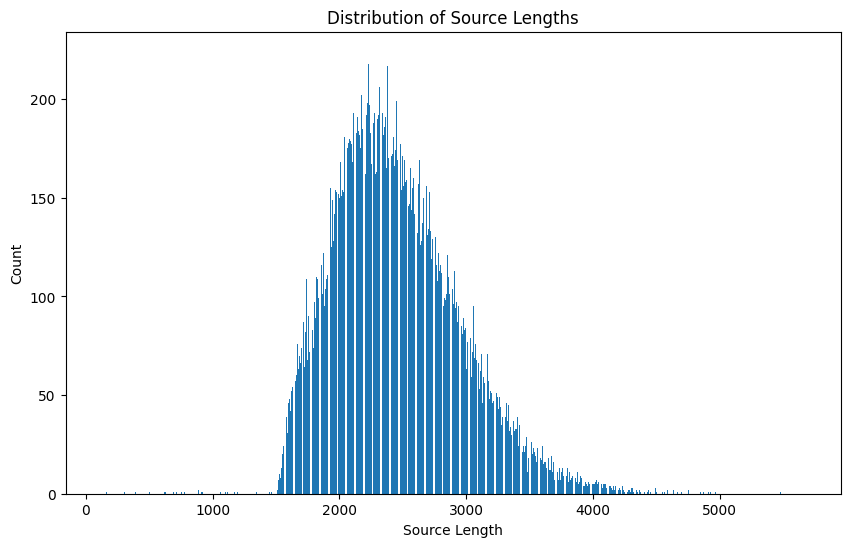

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(check_len["src_len"], check_len["count"])
plt.xlabel("Source Length")
plt.ylabel("Count")
plt.title("Distribution of Source Lengths")

shape: (3, 1)
┌────────────────────────┐
│ prefix                 │
│ ---                    │
│ str                    │
╞════════════════════════╡
│ terjemah ke Inggeris:  │
│ terjemah ke Tamil:     │
│ terjemah ke Mandarin:  │
└────────────────────────┘


Text(0.5, 1.0, 'Distribution of Source Lengths')

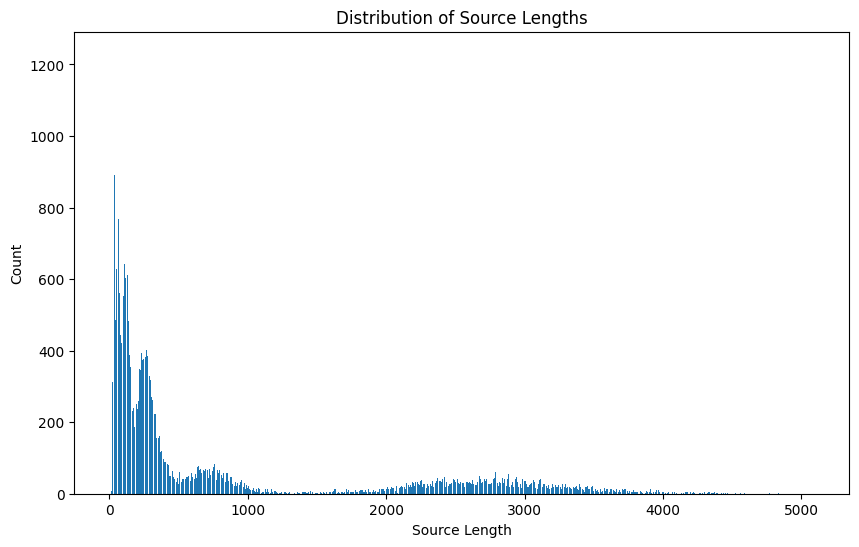

In [12]:
dataset = load_dataset(
    "mesolitica/Malaysian-Translation", 
    "stage1", 
    data_files="stage1/train-00012-of-00032.parquet",
    verification_mode=VerificationMode.NO_CHECKS
)

data_df = pl.DataFrame(list(dataset['train']))

check_len = (
    data_df
    .with_columns(
    src_len=pl.col("src").map_elements(len)
    )
    .select("src_len")
    .group_by("src_len")
    .agg(pl.col("src_len").len().alias("count"))
    )

print(
    data_df
    .select(pl.col("prefix"))
    .unique()
)

plt.figure(figsize=(10, 6))
plt.bar(check_len["src_len"], check_len["count"])
plt.xlabel("Source Length")
plt.ylabel("Count")
plt.title("Distribution of Source Lengths")

In [11]:
import matplotlib.pyplot as plt
import os

def check_dataset_info(data_files):
    metadata_dir = "../data/raw/metadata"
    fig_dir = "../data/raw/figs"
    os.makedirs(metadata_dir, exist_ok=True)
    os.makedirs(fig_dir, exist_ok=True)
    print("--------------------------------")
    dataset = load_dataset(
        "mesolitica/Malaysian-Translation", 
        data_files=data_files,
        verification_mode=VerificationMode.NO_CHECKS
    )
    print(data_files:=data_files.replace("/", "_").replace("\\", "_"))
    
    data_df = pl.DataFrame(list(dataset['train']))
    
    
    check_len = (
        data_df
        .with_columns(
        src_len=pl.col("src").map_elements(len)
        )
        .select("src_len")
        .group_by("src_len")
        .agg(pl.col("src_len").len().alias("count"))
    )
    
    import json

    prefix = data_df.select(pl.col("prefix")).unique()
    prefix_list = prefix.to_dicts()
    with open(f"{metadata_dir}/{data_files}.json", "w", encoding="utf-8") as f:
        json.dump(prefix_list, f, ensure_ascii=False, indent=4)
        
    plt.figure(figsize=(10, 6))
    plt.bar(check_len["src_len"], check_len["count"])
    plt.xlabel("Source Length")
    plt.ylabel("Count")
    plt.savefig(f"../data/raw/figs/{data_files}.png")
    plt.close()
    # plt.show()

In [12]:
import numpy as np
data_files = set()
while len(data_files) < 10:
    idx = np.random.randint(0, 32)
    data_file = f"stage1/train-{str(idx).rjust(5, '0')}-of-00032.parquet"
    data_files.add(data_file)
data_files = list(data_files)

for data_file in data_files:
    check_dataset_info(data_file)


'(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), '(Request ID: 266d2b46-5e67-4451-8c11-7591fca114aa)')' thrown while requesting HEAD https://huggingface.co/datasets/mesolitica/Malaysian-Translation/resolve/main/README.md
Retrying in 1s [Retry 1/5].


--------------------------------
stage1_train-00012-of-00032.parquet
--------------------------------


stage1/train-00008-of-00032.parquet:   0%|          | 0.00/251M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

stage1_train-00008-of-00032.parquet
--------------------------------


stage1/train-00031-of-00032.parquet:   0%|          | 0.00/287M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

stage1_train-00031-of-00032.parquet
--------------------------------


stage1/train-00025-of-00032.parquet:   0%|          | 0.00/65.6M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

stage1_train-00025-of-00032.parquet
--------------------------------


stage1/train-00023-of-00032.parquet:   0%|          | 0.00/65.6M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

stage1_train-00023-of-00032.parquet
--------------------------------


stage1/train-00002-of-00032.parquet:   0%|          | 0.00/634M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

stage1_train-00002-of-00032.parquet
--------------------------------
stage1_train-00007-of-00032.parquet
--------------------------------
stage1_train-00009-of-00032.parquet
--------------------------------
stage1_train-00021-of-00032.parquet
--------------------------------


stage1/train-00020-of-00032.parquet:   0%|          | 0.00/65.7M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

stage1_train-00020-of-00032.parquet


# Check dataset Distribution

In [20]:
from datasets import get_dataset_config_names
from huggingface_hub import list_repo_files
import numpy as np
import re

configs = get_dataset_config_names("mesolitica/Malaysian-Translation")[1:]  #ignore stage1

all_files = list_repo_files("mesolitica/Malaysian-Translation", repo_type="dataset")
config_shards = {}
for config in configs:
    files = [f for f in all_files if f.startswith(f"{config}/train-") and f.endswith(".parquet")]
    if files:
        max_shard = max(int(re.search(r'-of-(\d+)', f).group(1)) for f in files if re.search(r'-of-(\d+)', f))
        config_shards[config] = max_shard

data_files = []
for config, max_shard in config_shards.items():
    idx = np.random.randint(0, max_shard)
    data_file = f"{config}/train-{str(idx).rjust(5, '0')}-of-{str(max_shard).rjust(5, '0')}.parquet"
    data_files.append(data_file)

for data_file in data_files:
    check_dataset_info(data_file)


Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

--------------------------------


stage2-coding/train-00001-of-00004.parqu(…):   0%|          | 0.00/173M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

stage2-coding_train-00001-of-00004.parquet
--------------------------------


stage2-coding-blocks/train-00000-of-0000(…):   0%|          | 0.00/129M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

stage2-coding-blocks_train-00000-of-00001.parquet
--------------------------------


stage2-coding-blocks-dialects/train-0000(…):   0%|          | 0.00/23.1M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

stage2-coding-blocks-dialects_train-00000-of-00001.parquet
--------------------------------


stage2-coding-blocks-jawi/train-00000-of(…):   0%|          | 0.00/15.7M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

stage2-coding-blocks-jawi_train-00000-of-00001.parquet
--------------------------------
stage2-part1_train-00001-of-00002.parquet
--------------------------------


stage2-part2/train-00000-of-00012.parque(…):   0%|          | 0.00/323M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

stage2-part2_train-00000-of-00012.parquet


In [21]:
import numpy as np
data_files = set()
while len(data_files) < 4:
    idx = np.random.randint(0, 12)
    data_file = f"stage2-part2/train-{str(idx).rjust(5, '0')}-of-00012.parquet"
    data_files.add(data_file)
data_files = list(data_files)

for data_file in data_files:
    check_dataset_info(data_file)


'(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), '(Request ID: 40360455-fb50-44b9-8a42-57d836abc1f8)')' thrown while requesting HEAD https://huggingface.co/datasets/mesolitica/Malaysian-Translation/resolve/main/README.md
Retrying in 1s [Retry 1/5].


--------------------------------


stage2-part2/train-00007-of-00012.parque(…):   0%|          | 0.00/371M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

stage2-part2_train-00007-of-00012.parquet
--------------------------------


stage2-part2/train-00008-of-00012.parque(…):   0%|          | 0.00/94.8M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

stage2-part2_train-00008-of-00012.parquet
--------------------------------


stage2-part2/train-00010-of-00012.parque(…):   0%|          | 0.00/53.3M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

stage2-part2_train-00010-of-00012.parquet
--------------------------------


stage2-part2/train-00002-of-00012.parque(…):   0%|          | 0.00/321M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

stage2-part2_train-00002-of-00012.parquet


# Tokenization Test

In [22]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("mesolitica/nanot5-small-malaysian-cased")
model = AutoModelForSeq2SeqLM.from_pretrained("mesolitica/nanot5-small-malaysian-cased")

'(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), '(Request ID: 2481cc3b-ea57-4031-853c-3b86ee179567)')' thrown while requesting HEAD https://huggingface.co/mesolitica/nanot5-small-malaysian-cased/resolve/main/tokenizer_config.json
Retrying in 1s [Retry 1/5].


In [ ]:
for data in dataset_iter.take(15):
    src_tokens = tokenizer.encode(data["src"])
    tgt_tokens = tokenizer.encode(data["tgt"])
    print('-------------------------------------------------')
    print(data["src"][:10])
    print(data["tgt"][:10])
    print("src", len(data["src"]),"tokenized", len(src_tokens))
    print("tgt", len(data["tgt"]), "tokenized", len(tgt_tokens))


-------------------------------------------------
Wah, ramai
Pengkritik
src 1301 tokenized 296
tgt 2046 tokenized 358
-------------------------------------------------
Wah, ramai
Critics ha
src 1301 tokenized 296
tgt 2001 tokenized 461
-------------------------------------------------
Apasal la 
Mengapa se
src 513 tokenized 129
tgt 190 tokenized 29
-------------------------------------------------
Apasal la 
Why have s
src 513 tokenized 129
tgt 205 tokenized 46
-------------------------------------------------
Pengkritik
Wah, ramai
src 2046 tokenized 358
tgt 1301 tokenized 296
-------------------------------------------------
Critics ha
Wah, ramai
src 2001 tokenized 461
tgt 1301 tokenized 296
-------------------------------------------------
Mengapa se
Apasal la 
src 190 tokenized 29
tgt 513 tokenized 129
-------------------------------------------------
Why have s
Apasal la 
src 205 tokenized 46
tgt 513 tokenized 129
-------------------------------------------------
Wah, soala
Itu soa

In [ ]:
src_lens = []
src_token_lens = []
for data in dataset_iter.take(100):
    src = data["src"]
    src_tokens = tokenizer.encode(src)
    src_words = src.split()
    src_lens.append(len(src_words))
    src_token_lens.append(len(src_tokens))

avg_src_words = np.mean(src_lens)
avg_src_tokens = np.mean(src_token_lens)
avg_tokens_per_word = avg_src_tokens / avg_src_words

print(f"Average words per example: {avg_src_words:.2f}")
print(f"Average tokens per example: {avg_src_tokens:.2f}")
print(f"Average tokens per word: {avg_tokens_per_word:.2f}")

target_tokens = 350
estimated_words = int(target_tokens / avg_tokens_per_word)
print(estimated_words)


Average words per example: 184.33
Average tokens per example: 266.89
Average tokens per word: 1.45
Estimated safe word count for 350 tokens: 241
